In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [2]:
#Import the dataset
df = pd.read_csv('data_stocks.csv')

In [3]:
#Check for any NA’s in the dataframe.
df.isnull().values.any()

False

In [4]:
df['DATE'] = pd.to_datetime(df['DATE'], unit='s')

In [5]:
df['DATE'].head()

0   2017-04-03 13:30:00
1   2017-04-03 13:31:00
2   2017-04-03 13:32:00
3   2017-04-03 13:33:00
4   2017-04-03 13:34:00
Name: DATE, dtype: datetime64[ns]

In [6]:
df.set_index(['DATE'],inplace=True)

In [7]:
df.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


## 1. NASDAQ.AAPL

In [8]:
#Makes a copy of df dataframe.
df1 = df.copy()

In [9]:
#Creating a column 'AAPL_LOG' with the log values of 'NASDAQ.AAPL' column data
df1["AAPL_LOG"] = df1["NASDAQ.AAPL"].apply(lambda x:np.log(x))

In [10]:
#Returns the first 5 rows of df1 dataframe
df1.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,AAPL_LOG
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.967589
2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.967728
2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.967659
2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.967310
2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.967449


In [11]:
df1["AAPL_LOG"].count()

41266

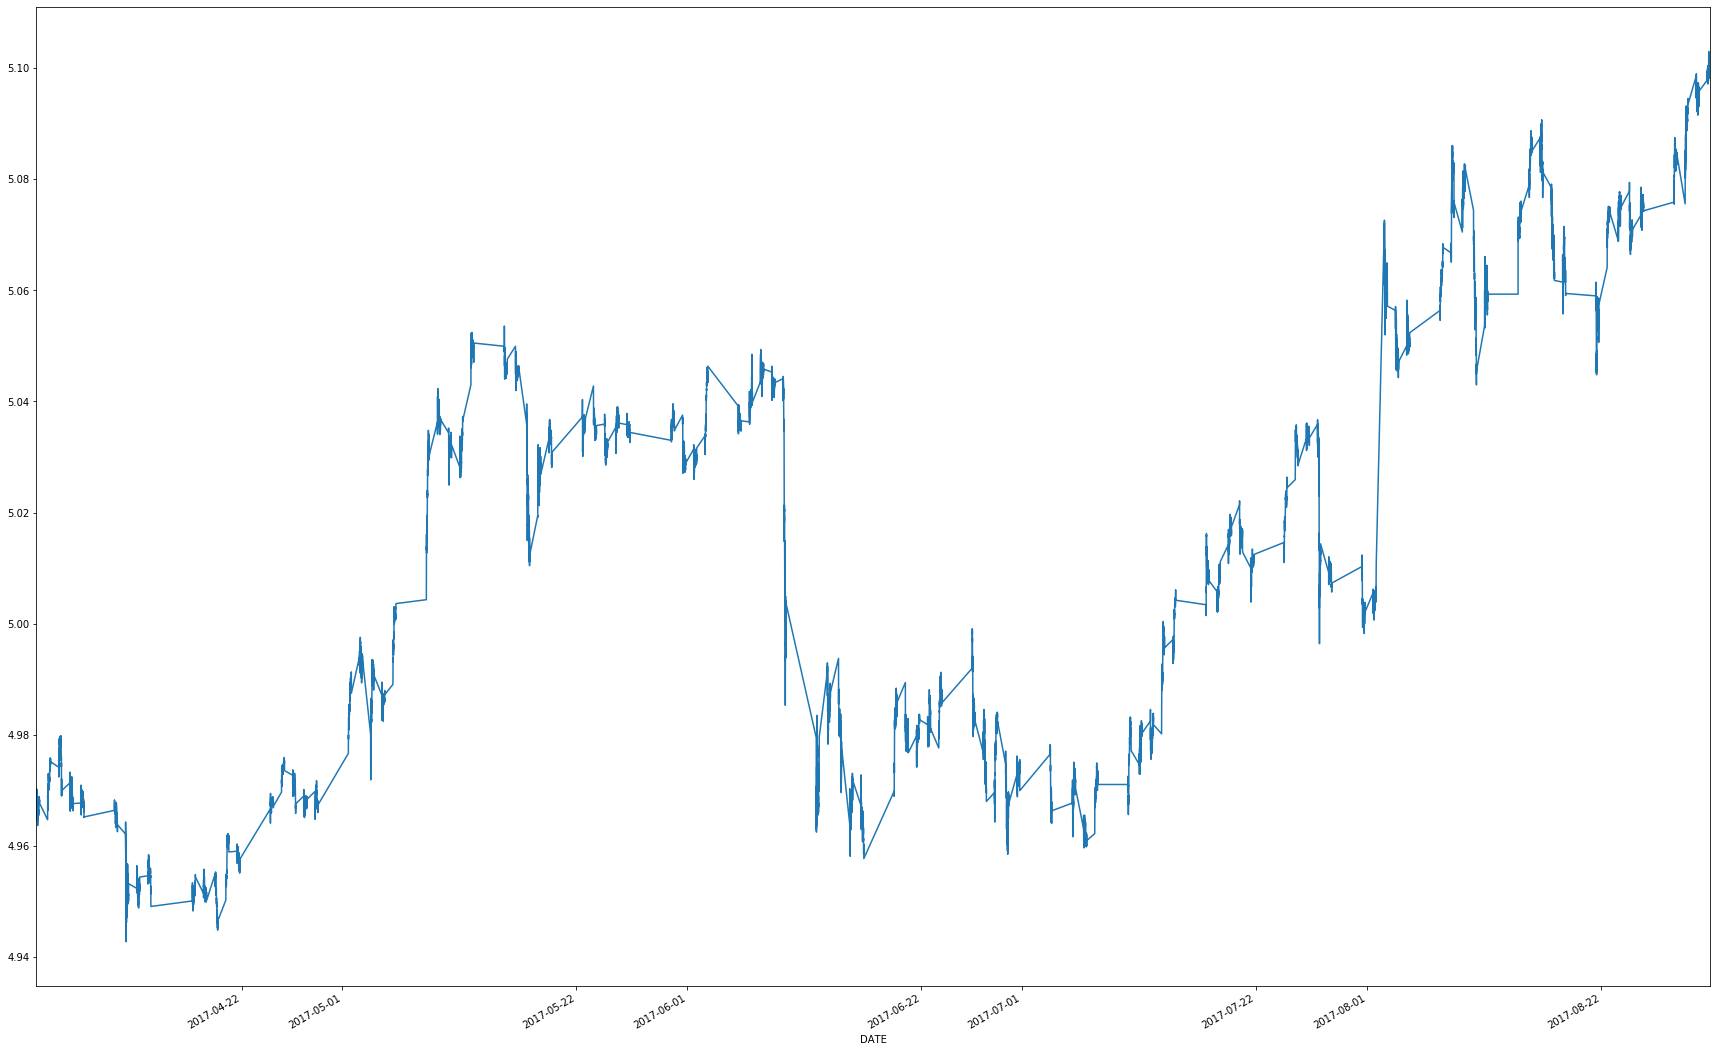

In [12]:
#Series Plot
df1["AAPL_LOG"].plot(figsize=(30,20))
plt.show()

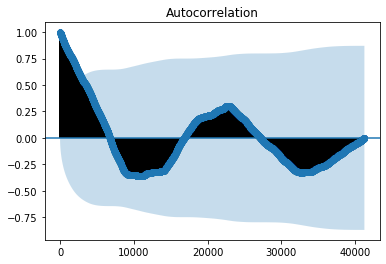

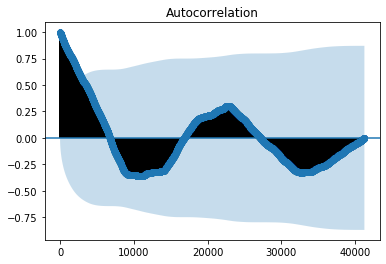

In [13]:
plot_acf(df1["AAPL_LOG"])

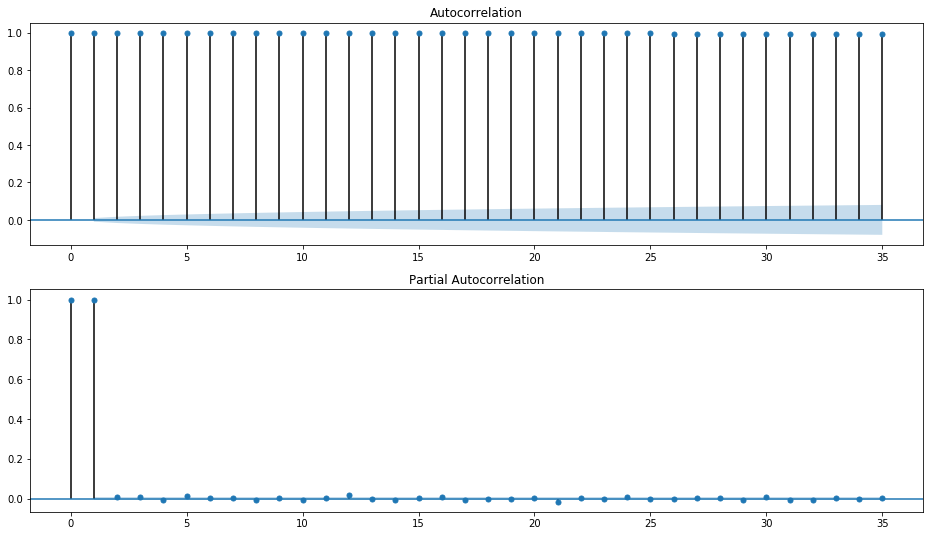

In [14]:
#Autocorrelation Plot
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1["AAPL_LOG"].values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1["AAPL_LOG"], lags=35, ax=ax2)

In [15]:
#Getting the 'ADP_LOG' column values as array with dropping NaN values
array1 = (df1["AAPL_LOG"].dropna().as_matrix())

In [16]:
#Creating a column 'AAPL_LOG_DIFF' with data as difference of 'AAPL_LOG' column current row and previous row
df1["AAPL_LOG_DIFF"] = df1["AAPL_LOG"] - df1["AAPL_LOG"].shift(periods=-1)

In [17]:
#Finding the best values for ARIMA model parameter
aic=999999
best_values = [0,0,0]

for p in range(3):
    for d in range(3):
        for q in range(3):
            try:
                model= ARIMA(array1,(p,d,q)).fit()
                if  (model.aic < aic):
                    aic = model.aic
                    best_values = [p,d,q]
            except:
                pass
                
print(best_values)

C:\Users\abdewang.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\abdewang.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\abdewang.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[2, 0, 2]


C:\Users\abdewang.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [18]:
#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model
model_arima = ARIMA(array1, order=(2,0,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-492730.0781872505


In [19]:
pred1 = model_arima_fit.predict()
pred1

array([5.02100589, 4.96759277, 4.96773062, ..., 5.10059484, 5.09992434,
       5.09914905])

In [20]:
from sklearn.metrics import mean_squared_error
#Printing RMSE value for the mode2
print("RMSE for Model-1=",np.sqrt(mean_squared_error(pred1,array1)))

RMSE for Model-1= 0.0006714176545499994


## 2. NASDAQ.ADP

In [21]:
#Makes a copy of df dataframe.
df2 = df.copy()

In [22]:
#Creating a column 'AAPL_LOG' with the log values of 'NASDAQ.AAPL' column data
df2["ADP_LOG"] = df2["NASDAQ.ADP"].apply(lambda x:np.log(x))

In [23]:
#Returns the first 5 rows of df1 dataframe
df2.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,ADP_LOG
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.627225
2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.626344
2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.627054
2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.626344
2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.625561


In [24]:
df2["ADP_LOG"].count()

41266

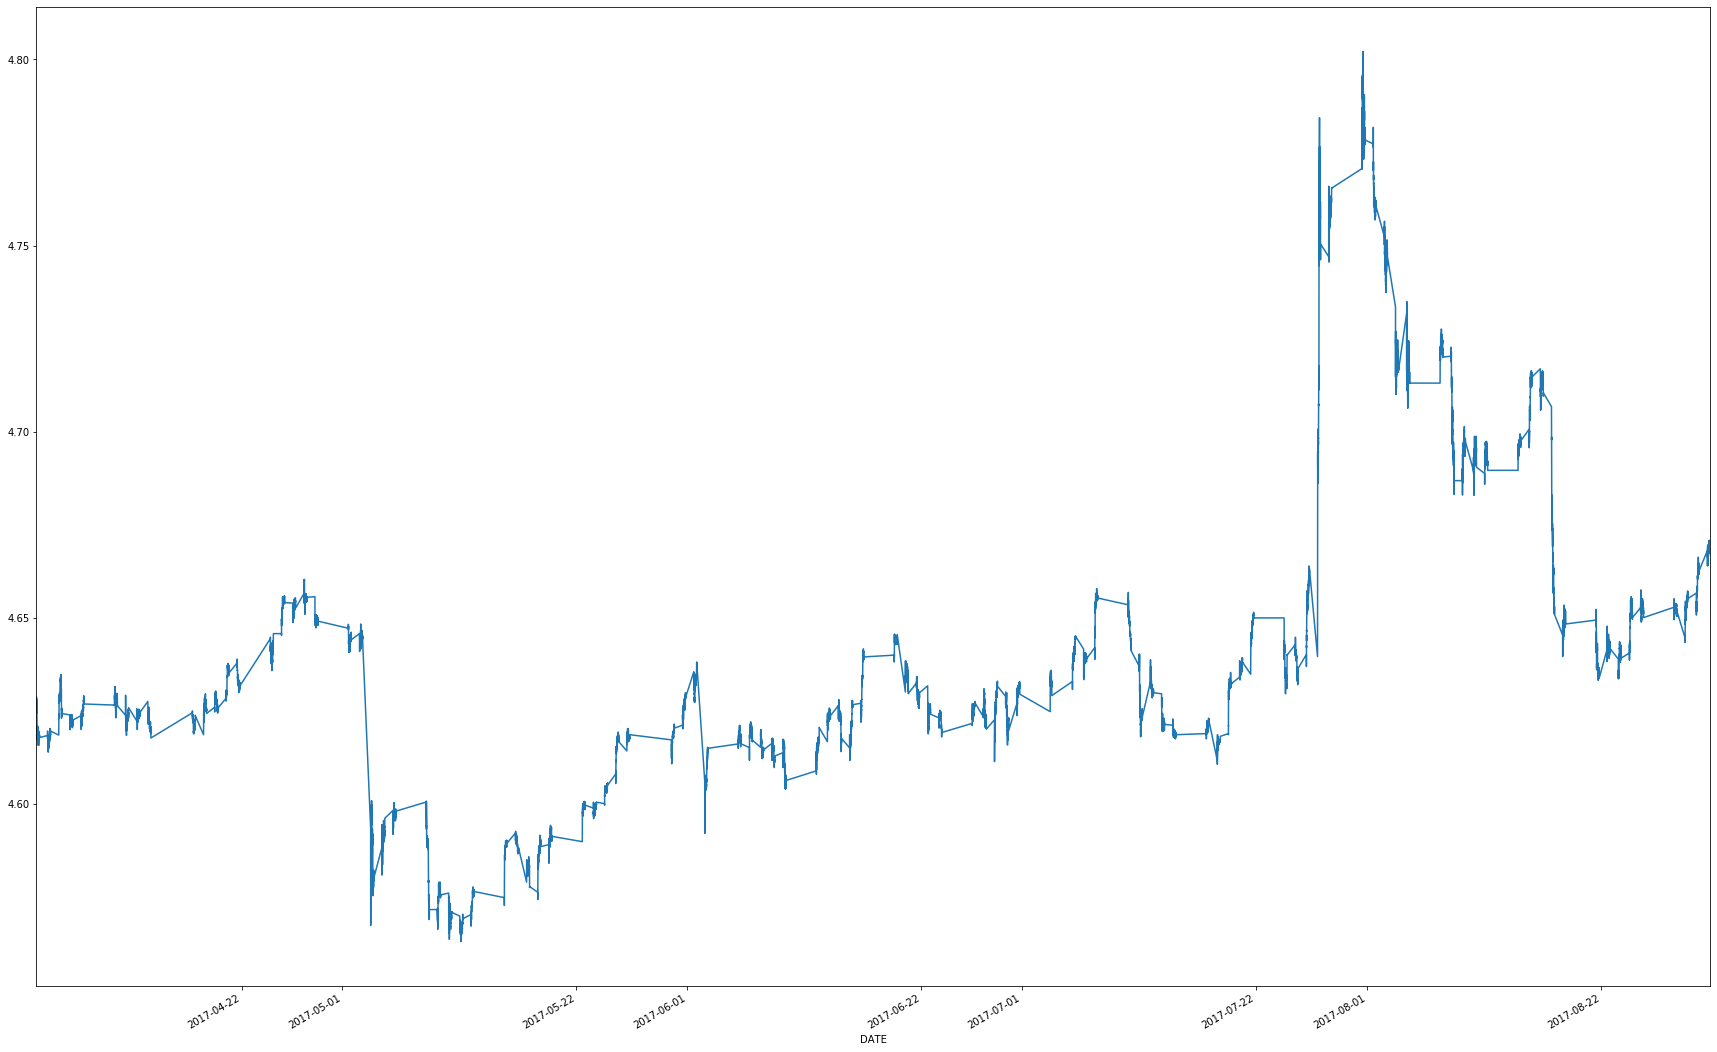

In [25]:
#Series Plot
df2["ADP_LOG"].plot(figsize=(30,20))
plt.show()

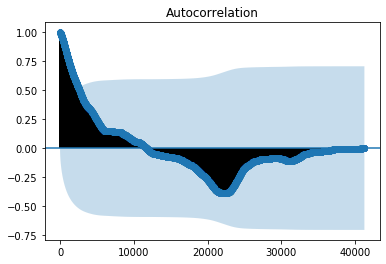

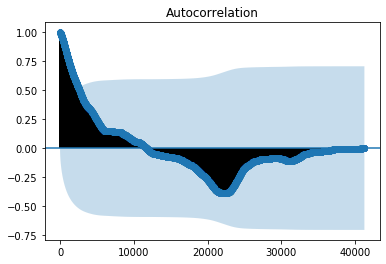

In [26]:
plot_acf(df2["ADP_LOG"])

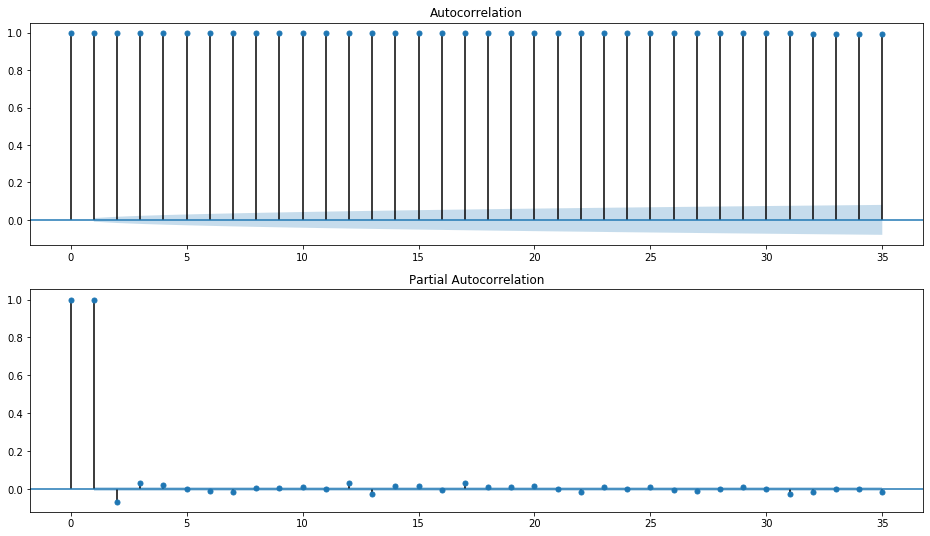

In [27]:
#Autocorrelation Plot
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2["ADP_LOG"].values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2["ADP_LOG"], lags=35, ax=ax2)

In [28]:
#Getting the 'ADP_LOG' column values as array with dropping NaN values
array2 = (df2["ADP_LOG"].dropna().as_matrix())

In [29]:
#Creating a column 'AAPL_LOG_DIFF' with data as difference of 'AAPL_LOG' column current row and previous row
df2["ADP_LOG_DIFF"] = df2["ADP_LOG"] - df2["ADP_LOG"].shift(periods=-1)

In [30]:
#Finding the best values for ARIMA model parameter
aic=999999
best_values = [0,0,0]

for p in range(3):
    for d in range(3):
        for q in range(3):
            try:
                model= ARIMA(array2,(p,d,q)).fit()
                if  (model.aic < aic):
                    aic = model.aic
                    best_values = [p,d,q]
            except:
                pass
                
print(best_values)

C:\Users\abdewang.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[2, 1, 2]


In [31]:
#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model
model_arima = ARIMA(array2, order=(2,1,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-482725.61023966526


In [32]:
pred2 = model_arima_fit.predict()
pred2

array([ 1.02562448e-06, -5.18737199e-05,  6.73538474e-05, ...,
        2.68465943e-05, -3.28700109e-05, -5.56618856e-05])

In [33]:
from sklearn.metrics import mean_squared_error
#Printing RMSE value for the model2
print("RMSE for Model-2=",np.sqrt(mean_squared_error(pred2,array2[:-1])))

RMSE for Model-2= 4.638686287011203


## 3. NASDAQ.CBOE 

In [34]:
#Makes a copy of df dataframe.
df3 = df.copy()

In [35]:
#Creating a column 'CBOE_LOG' with the log values of 'NASDAQ.CBOE' column data
df3["CBOE_LOG"] = df3["NASDAQ.CBOE"].apply(lambda x:np.log(x))

In [36]:
#Returns the first 5 rows of df3 dataframe
df3.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,CBOE_LOG
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.394819
2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.397038
2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.397038
2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.396053
2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.395930


In [37]:
df3["CBOE_LOG"].count()

41266

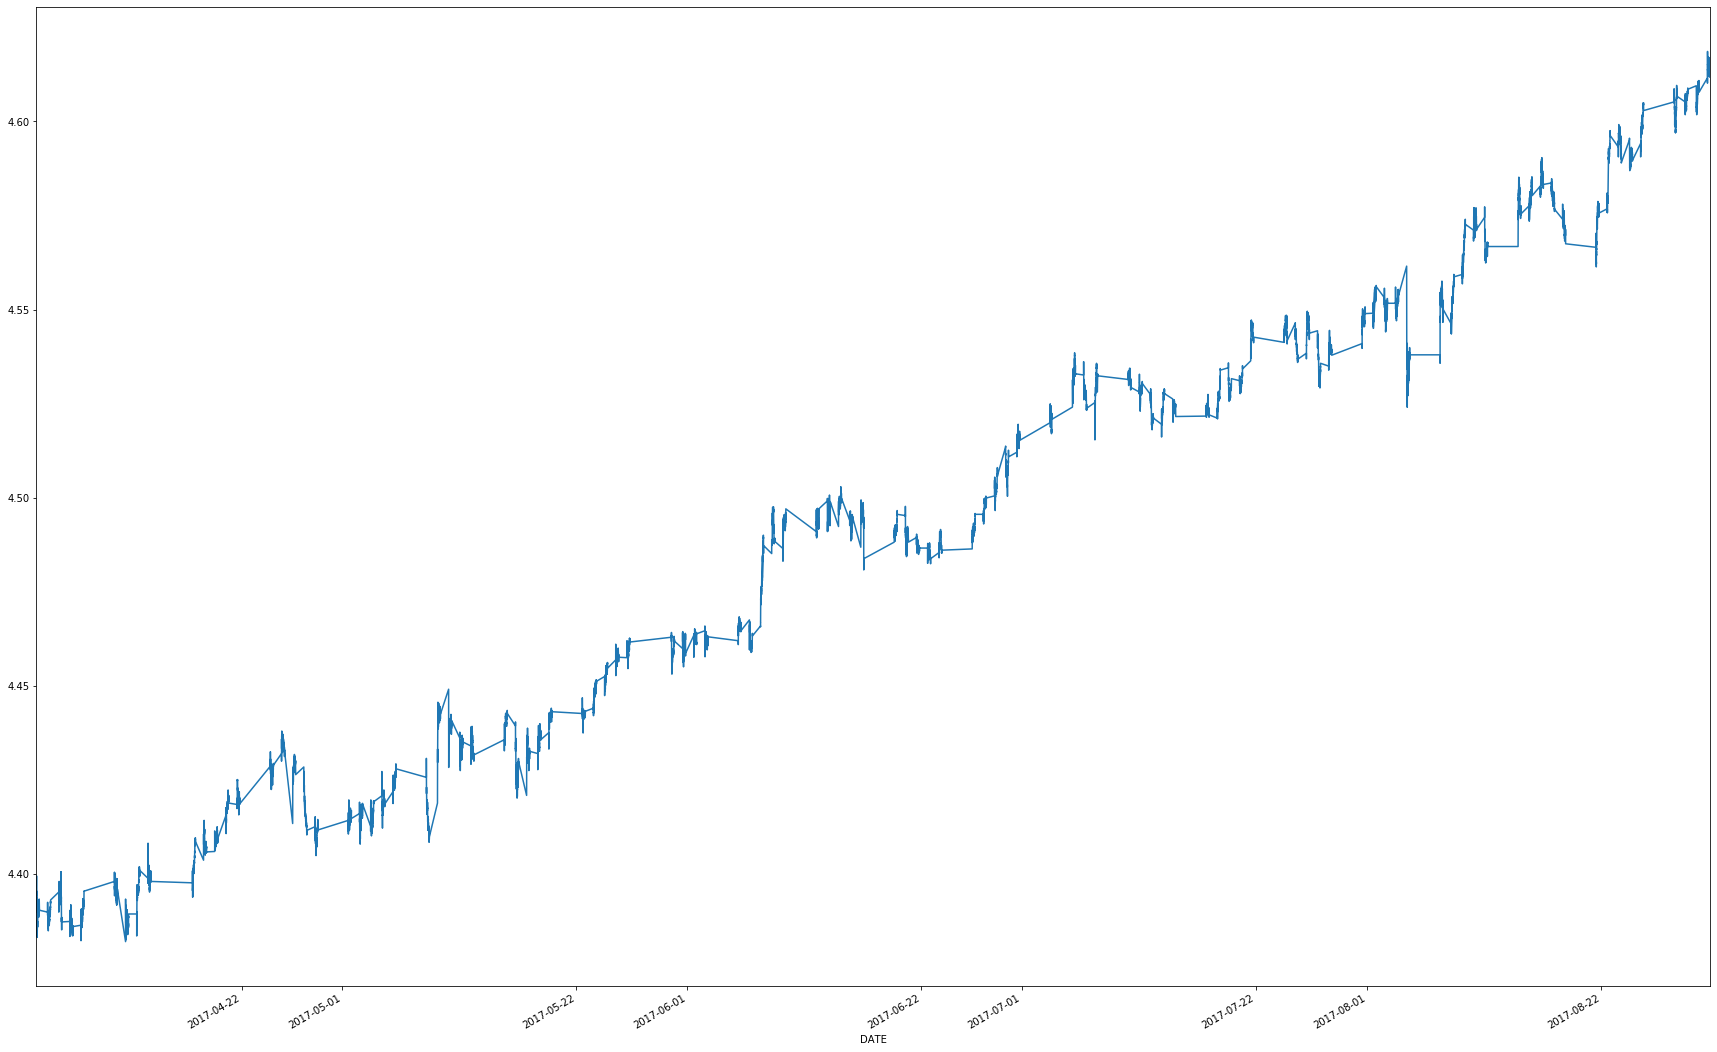

In [38]:
#Series Plot
df3["CBOE_LOG"].plot(figsize=(30,20))
plt.show()

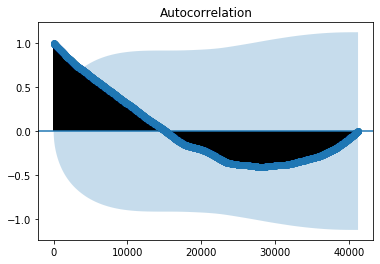

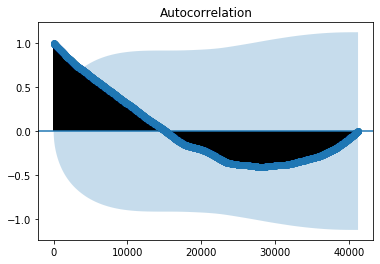

In [39]:
plot_acf(df3["CBOE_LOG"])

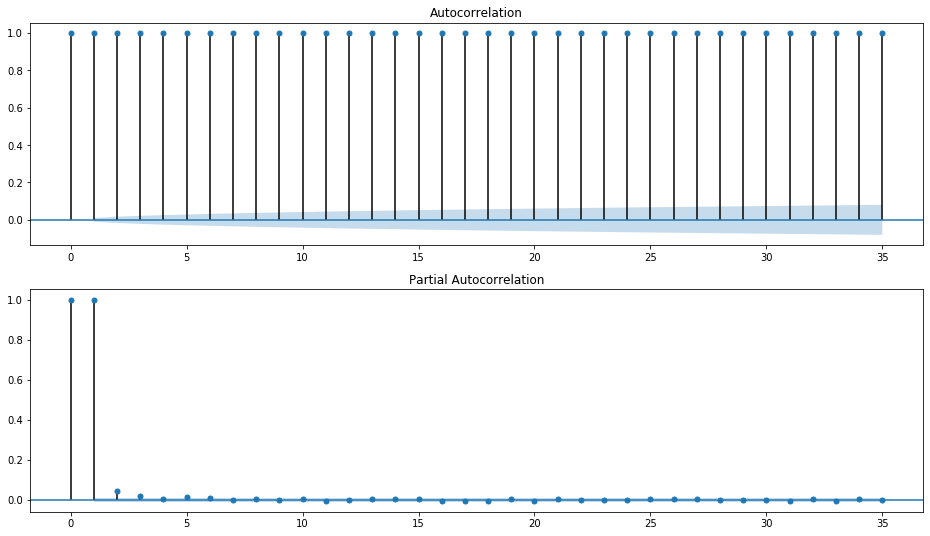

In [40]:
#Autocorrelation Plot
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df3["CBOE_LOG"].values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df3["CBOE_LOG"], lags=35, ax=ax2)

In [41]:
#Getting the 'ADP_LOG' column values as array with dropping NaN values
array3 = (df3["CBOE_LOG"].dropna().as_matrix())

In [42]:
#Creating a column 'AAPL_LOG_DIFF' with data as difference of 'CBOE_LOG' column current row and previous row
df3["CBOE_LOG_DIFF"] = df3["CBOE_LOG"] - df3["CBOE_LOG"].shift(periods=-1)

In [43]:
#Finding the best values for ARIMA model parameter
aic=999999
best_values = [0,0,0]

for p in range(3):
    for d in range(3):
        for q in range(3):
            try:
                model= ARIMA(array3,(p,d,q)).fit()
                if  (model.aic < aic):
                    aic = model.aic
                    best_values = [p,d,q]
            except:
                pass
                
print(best_values)

C:\Users\abdewang.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[2, 0, 2]


In [44]:
#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model
model_arima = ARIMA(array3, order=(2,0,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-506483.0280865378


In [45]:
pred3 = model_arima_fit.predict()
pred3

array([4.50296524, 4.39482061, 4.39686863, ..., 4.6139402 , 4.61375467,
       4.6134735 ])

In [46]:
from sklearn.metrics import mean_squared_error
#Printing RMSE value for the model3
print("RMSE for Model-3=",np.sqrt(mean_squared_error(pred3,array3)))

RMSE for Model-3= 0.000746251160956686


## 4. NASDAQ.CSCO 

In [47]:
#Makes a copy of df dataframe.
df4 = df.copy()

In [48]:
#Creating a column 'CSCO_LOG' with the log values of 'NASDAQ.CSCO' column data
df4["CSCO_LOG"] = df4["NASDAQ.CSCO"].apply(lambda x:np.log(x))

In [49]:
#Returns the first 5 rows of df4 dataframe
df4.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,CSCO_LOG
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,3.518684
2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,3.522825
2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,3.523415
2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,3.521936
2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,3.521644


In [50]:
df4["CSCO_LOG"].count()

41266

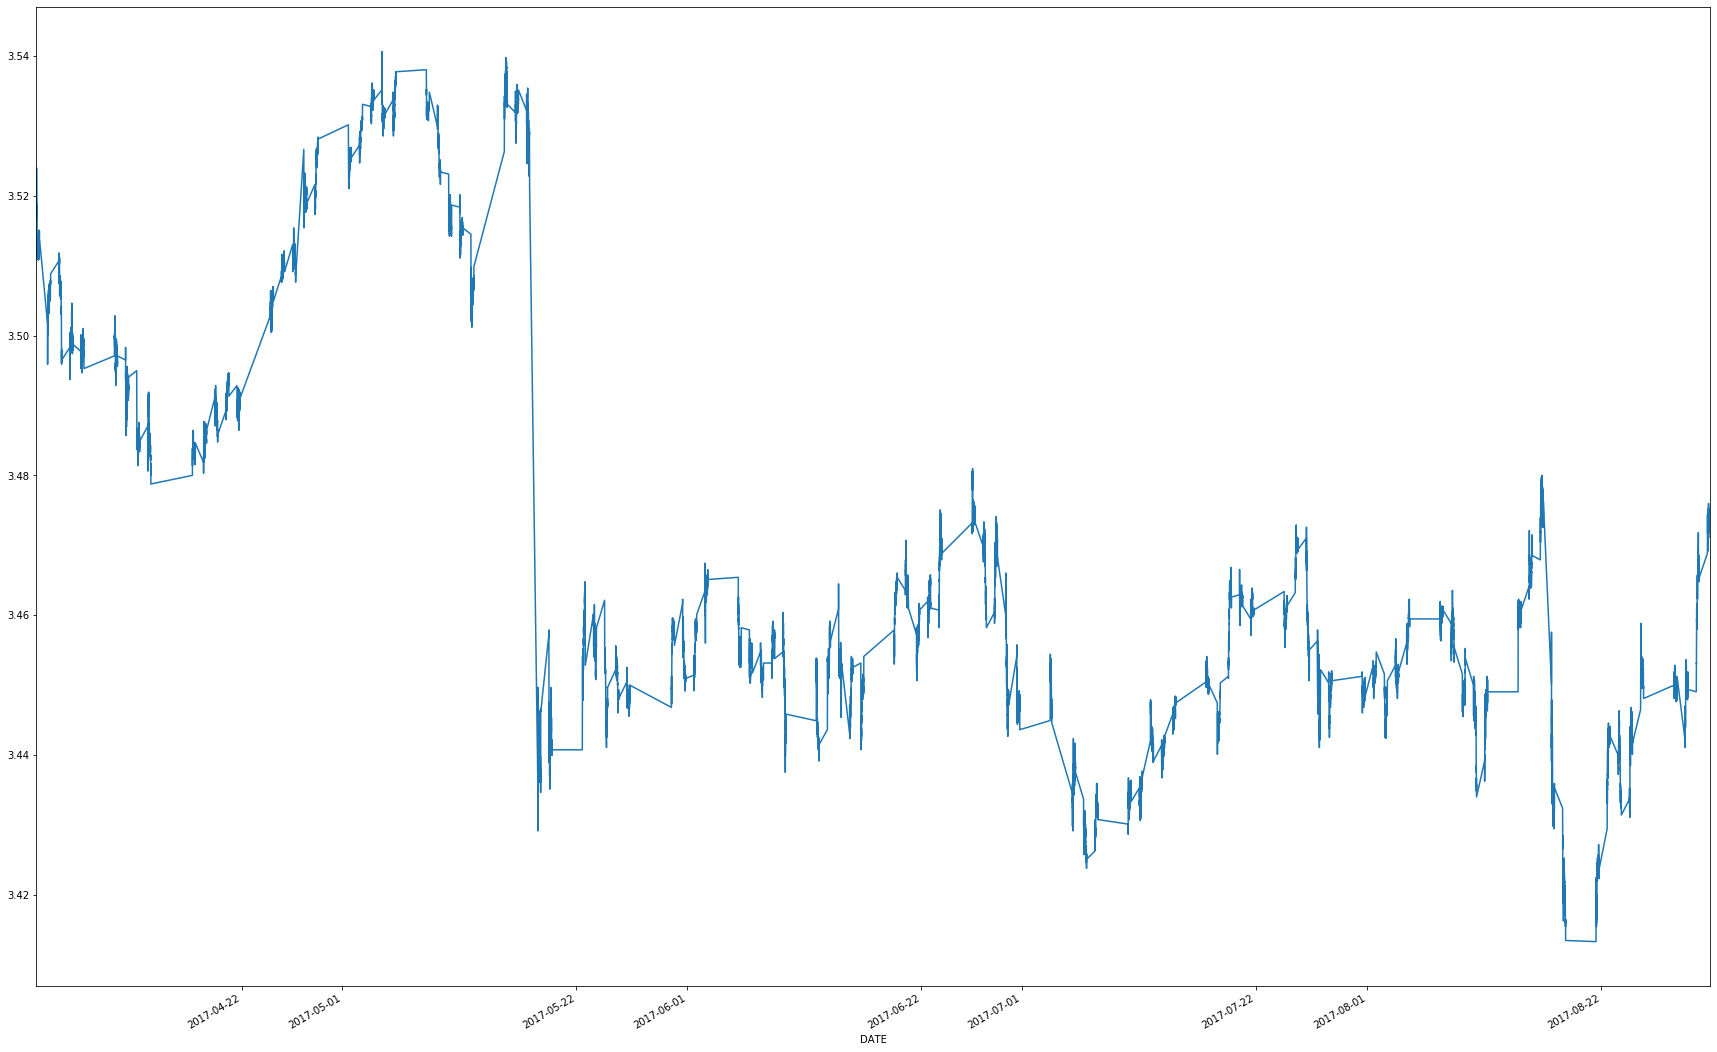

In [51]:
#Series Plot
df4["CSCO_LOG"].plot(figsize=(30,20))
plt.show()

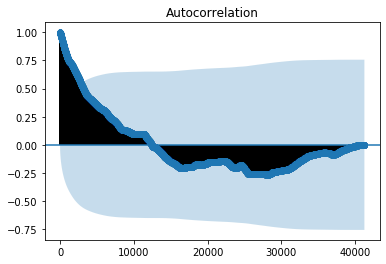

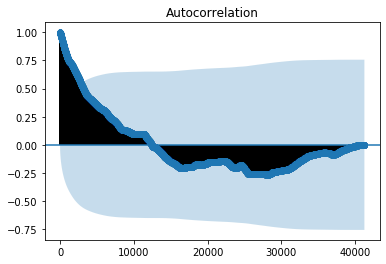

In [52]:
plot_acf(df4["CSCO_LOG"])

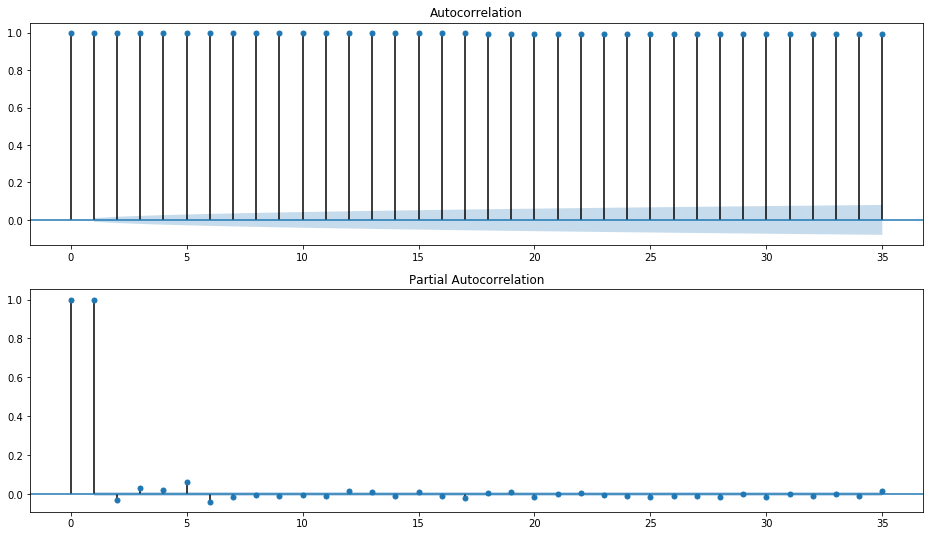

In [53]:
#Autocorrelation Plot
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df4["CSCO_LOG"].values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df4["CSCO_LOG"], lags=35, ax=ax2)

In [54]:
#Getting the 'ADP_LOG' column values as array with dropping NaN values
array4 = (df4["CSCO_LOG"].dropna().as_matrix())

In [55]:
#Creating a column 'AAPL_LOG_DIFF' with data as difference of 'CSCO_LOG' column current row and previous row
df4["CSCO_LOG_DIFF"] = df4["CSCO_LOG"] - df4["CSCO_LOG"].shift(periods=-1)

In [56]:
#Finding the best values for ARIMA model parameter
aic=999999
best_values = [0,0,0]

for p in range(3):
    for d in range(3):
        for q in range(3):
            try:
                model= ARIMA(array4,(p,d,q)).fit()
                if  (model.aic < aic):
                    aic = model.aic
                    best_values = [p,d,q]
            except:
                pass
                
print(best_values)

[2, 0, 2]


In [57]:
#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model
model_arima = ARIMA(array4, order=(2,0,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-486977.35062621214


In [58]:
pred4 = model_arima_fit.predict()
pred4

array([3.47474874, 3.51867388, 3.52287821, ..., 3.47197015, 3.47194718,
       3.47179966])

In [59]:
from sklearn.metrics import mean_squared_error
#Printing RMSE value for the model4
print("RMSE for Model-4=",np.sqrt(mean_squared_error(pred4,array4)))

RMSE for Model-4= 0.0006967982645552838


## 5. NASDAQ.EBAY

In [60]:
#Makes a copy of df dataframe.
df5 = df.copy()

In [61]:
#Creating a column 'EBAY_LOG' with the log values of 'NASDAQ.EBAY' column data
df5["EBAY_LOG"] = df5["NASDAQ.EBAY"].apply(lambda x:np.log(x))

In [62]:
#Returns the first 5 rows of df5 dataframe
df5.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,EBAY_LOG
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,3.508481
2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,3.508406
2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,3.508855
2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,3.506608
2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,3.508556


In [63]:
df5["EBAY_LOG"].count()

41266

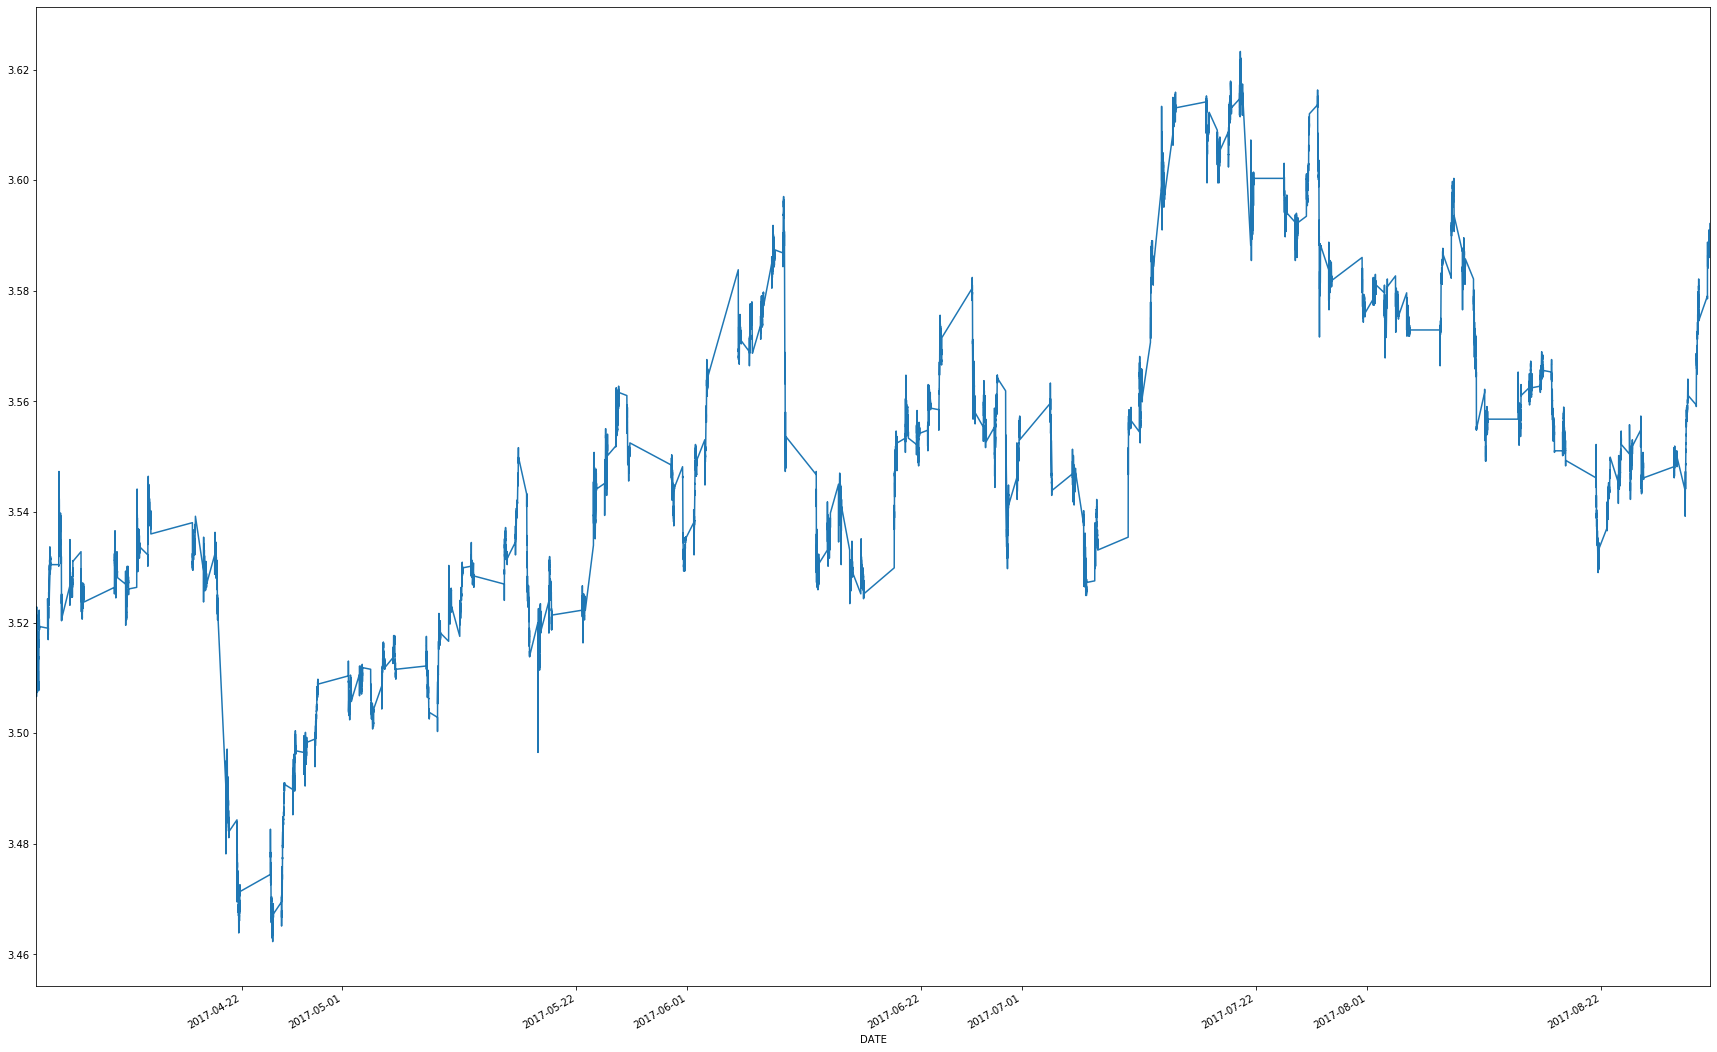

In [64]:
#Series Plot
df5["EBAY_LOG"].plot(figsize=(30,20))
plt.show()

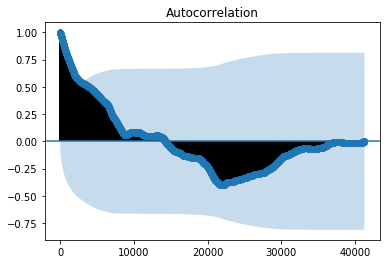

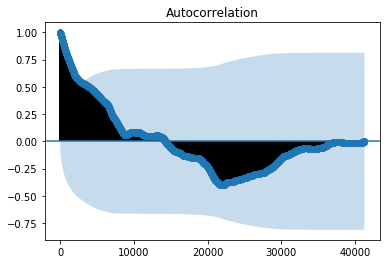

In [65]:
plot_acf(df5["EBAY_LOG"])

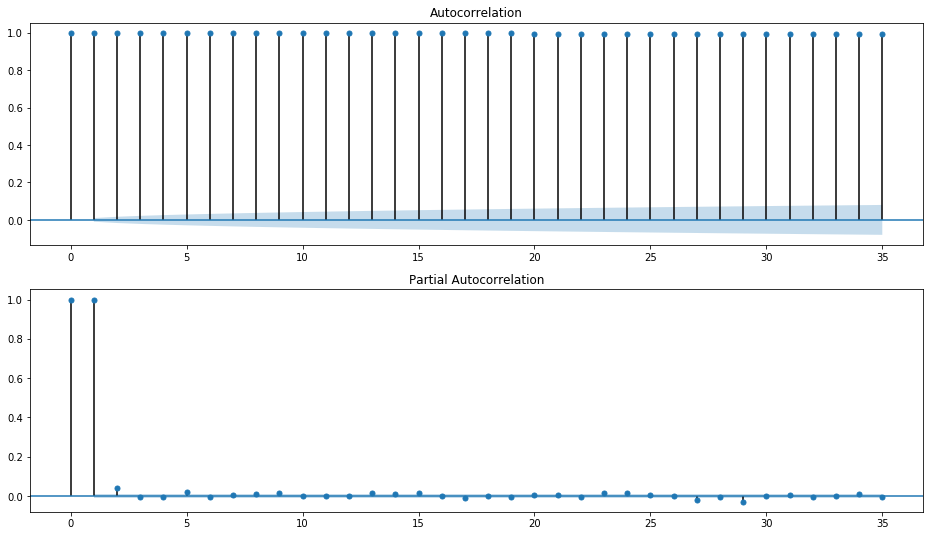

In [66]:
#Autocorrelation Plot
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df5["EBAY_LOG"].values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df5["EBAY_LOG"], lags=35, ax=ax2)

In [67]:
#Getting the 'ADP_LOG' column values as array with dropping NaN values
array5 = (df5["EBAY_LOG"].dropna().as_matrix())

In [68]:
#Creating a column 'AAPL_LOG_DIFF' with data as difference of 'EBAY_LOG' column current row and previous row
df5["EBAY_LOG_DIFF"] = df5["EBAY_LOG"] - df5["EBAY_LOG"].shift(periods=-1)

In [69]:
#Finding the best values for ARIMA model parameter
aic=999999
best_values = [0,0,0]

for p in range(3):
    for d in range(3):
        for q in range(3):
            try:
                model= ARIMA(array5,(p,d,q)).fit()
                if  (model.aic < aic):
                    aic = model.aic
                    best_values = [p,d,q]
            except:
                pass
                
print(best_values)

C:\Users\abdewang.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\abdewang.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[2, 0, 0]


C:\Users\abdewang.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [70]:
#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model
model_arima = ARIMA(array5, order=(2,0,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-486608.4996361916


In [71]:
pred5 = model_arima_fit.predict()
pred5

array([3.54872696, 3.50848945, 3.50841727, ..., 3.58712137, 3.58711584,
       3.58685015])

In [72]:
from sklearn.metrics import mean_squared_error
#Printing RMSE value for the model5
print("RMSE for Model-5=",np.sqrt(mean_squared_error(pred5,array5)))

RMSE for Model-5= 0.0006942528112181933
